In [3]:
import pandas as pd
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dtincome = pd.read_csv("/Machine Learning/Data/Ingresos_Mensuales.csv")
#se muestra el dataframe
dtincome.head()

,Nombre,Edad,Ingresos
0,DAYAN,27,7000000
1,HELMAN,29,9000000
2,JOHNATAN,30,6100000
3,JAIME,30,6000000
4,DANIELA,28,15000000


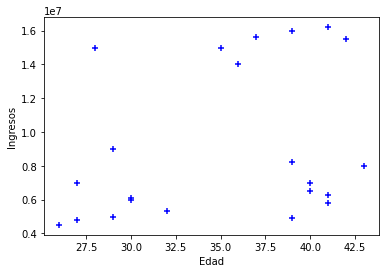

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Edad')
plt.ylabel('Ingresos')

plt.scatter(dtincome.Edad, dtincome.Ingresos, color ='blue',marker='+')

In [5]:
#Se importa la libreria de KMeans y se definen el número de cluster 
from sklearn.cluster import KMeans
Km=KMeans(n_clusters=3)
Km

KMeans(n_clusters=3)

In [6]:
#Se vizualizaran en un vector las predicciones 
y_predict = Km.fit_predict(dtincome[['Edad','Ingresos']])
y_predict

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1])

In [9]:
#Agregamos una columna para identificar a los clusters
dtincome['cluster'] = y_predict
dtincome.head()

,Nombre,Edad,Ingresos,cluster
0,DAYAN,27,7000000,1
1,HELMAN,29,9000000,1
2,JOHNATAN,30,6100000,2
3,JAIME,30,6000000,2
4,DANIELA,28,15000000,0


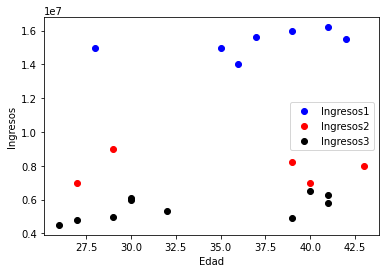

In [8]:
# Se etiquetarán los clusteres 
import numpy as np
import matplotlib.pyplot as plt

dtincome1 = dtincome[dtincome.cluster==0]
dtincome2 = dtincome[dtincome.cluster==1]
dtincome3 = dtincome[dtincome.cluster==2]

plt.scatter(dtincome1.Edad,dtincome1['Ingresos'], color='blue')
plt.scatter(dtincome2.Edad,dtincome2['Ingresos'], color='red')
plt.scatter(dtincome3.Edad,dtincome3['Ingresos'], color='black')

plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.legend(['Ingresos1', 'Ingresos2', 'Ingresos3'])
plt.show()

In [10]:
#Importamos MinMaxScaler, para normalizar los datos, de igual forma se suprime la columna Nombre y cluster, dado a que no son relevantes
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dtincometmp= dtincome.drop(['Nombre'], axis='columns')
cluster_tmp =pd.DataFrame(dtincometmp.cluster)
dtincometmp= dtincome.drop(['Nombre','cluster'], axis='columns')
dtincometmp.head()

,Edad,Ingresos
0,27,7000000
1,29,9000000
2,30,6100000
3,30,6000000
4,28,15000000


In [189]:
#Se ajustan y normalizan los datos
scaler.fit(dtincometmp)
dtincometmp = scaler.transform(dtincometmp)
dtincometmp

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.23529412, 0.13675214],
       [0.23529412, 0.12820513],
       [0.11764706, 0.8974359 ],
       [0.94117647, 0.94017094],
       [0.76470588, 0.98290598],
       [0.88235294, 1.        ],
       [0.64705882, 0.94871795],
       [0.58823529, 0.81196581],
       [0.52941176, 0.8974359 ],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607],
       [0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.2991453 ],
       [0.76470588, 0.31623932],
       [0.88235294, 0.11111111],
       [0.76470588, 0.03418803],
       [0.82352941, 0.21367521]])

In [ ]:
# Visualización de centroides 
Km.cluster_centers_

array([[3.68571429e+01, 1.53285714e+07],
       [3.56000000e+01, 7.84000000e+06],
       [3.35000000e+01, 5.51500000e+06]])

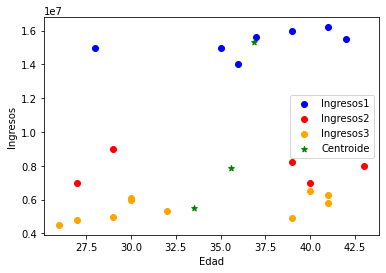

In [14]:
# Se viualizarán los clusteres con los centroides 
dtincome1 = dtincome[dtincome.cluster==0]
dtincome2 = dtincome[dtincome.cluster==1]
dtincome3 = dtincome[dtincome.cluster==2]

plt.scatter(dtincome1.Edad,dtincome1['Ingresos'], color='blue')
plt.scatter(dtincome2.Edad,dtincome2['Ingresos'], color='red')
plt.scatter(dtincome3.Edad,dtincome3['Ingresos'], color='orange')

plt.scatter(Km.cluster_centers_[:,0], Km.cluster_centers_[:,1],color='green', marker='*', label='centroide')

plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.legend(['Ingresos1', 'Ingresos2', 'Ingresos3', 'Centroide'])
plt.show()

[418666931818894.75, 28755285714964.977, 10736535714950.268, 5534857143434.914, 3234738095737.7593, 2178166667154.3162, 1511500000474.15, 971500000378.15, 669000000377.9]


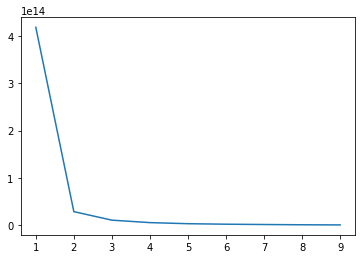

In [17]:
#Visualizaremos la inercia mediante la técnica del codo
vector_sse=[]
vector_no_of_cluster = []

for i in range(1,10): 
    km = KMeans(n_clusters=i)
    cluster_predicted = km.fit(dtincometmp[['Edad', 'Ingresos']])
    vector_no_of_cluster.append(i) 
    vector_sse.append(cluster_predicted.inertia_)
print(sse)
plt.plot(vector_no_of_cluster, vector_sse)